# Build the Machine Learning Model (Decision Tree) to Predict Covid-19

In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


## Data Anaysis
### Import data

In [2]:
# data source: https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence
data = pd.read_csv('./Covid Dataset.csv')
data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


### Data information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [17]:
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [18]:
data.columns

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


### Data visualization on COVID-19 field
This show in this dataset, more people are positive than negative.

<Axes: xlabel='COVID-19', ylabel='count'>

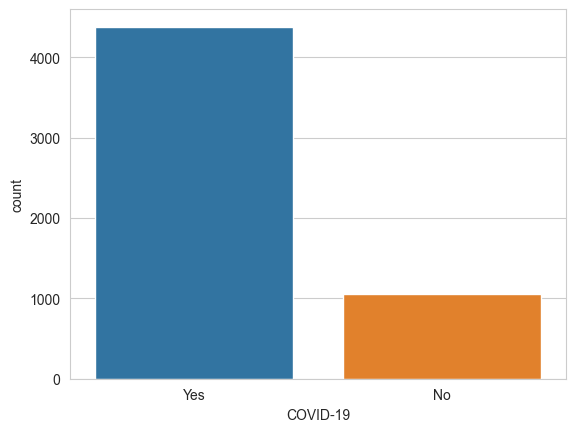

In [6]:
sns.set_style("whitegrid")
sns.countplot(x='COVID-19',data= data)

### Data visualizations on different features (colored by covid-19 field)
From these plots, we can know which columns have more influence on predicting covid. Each plot has two values on X-axis: "YES" and "NO". And the hue in columns(blue and orange) deciphers the covid result. By comparing the height difference of different-color columns, we can get an idea of which symptoms have more influence on diagnosing COVID.

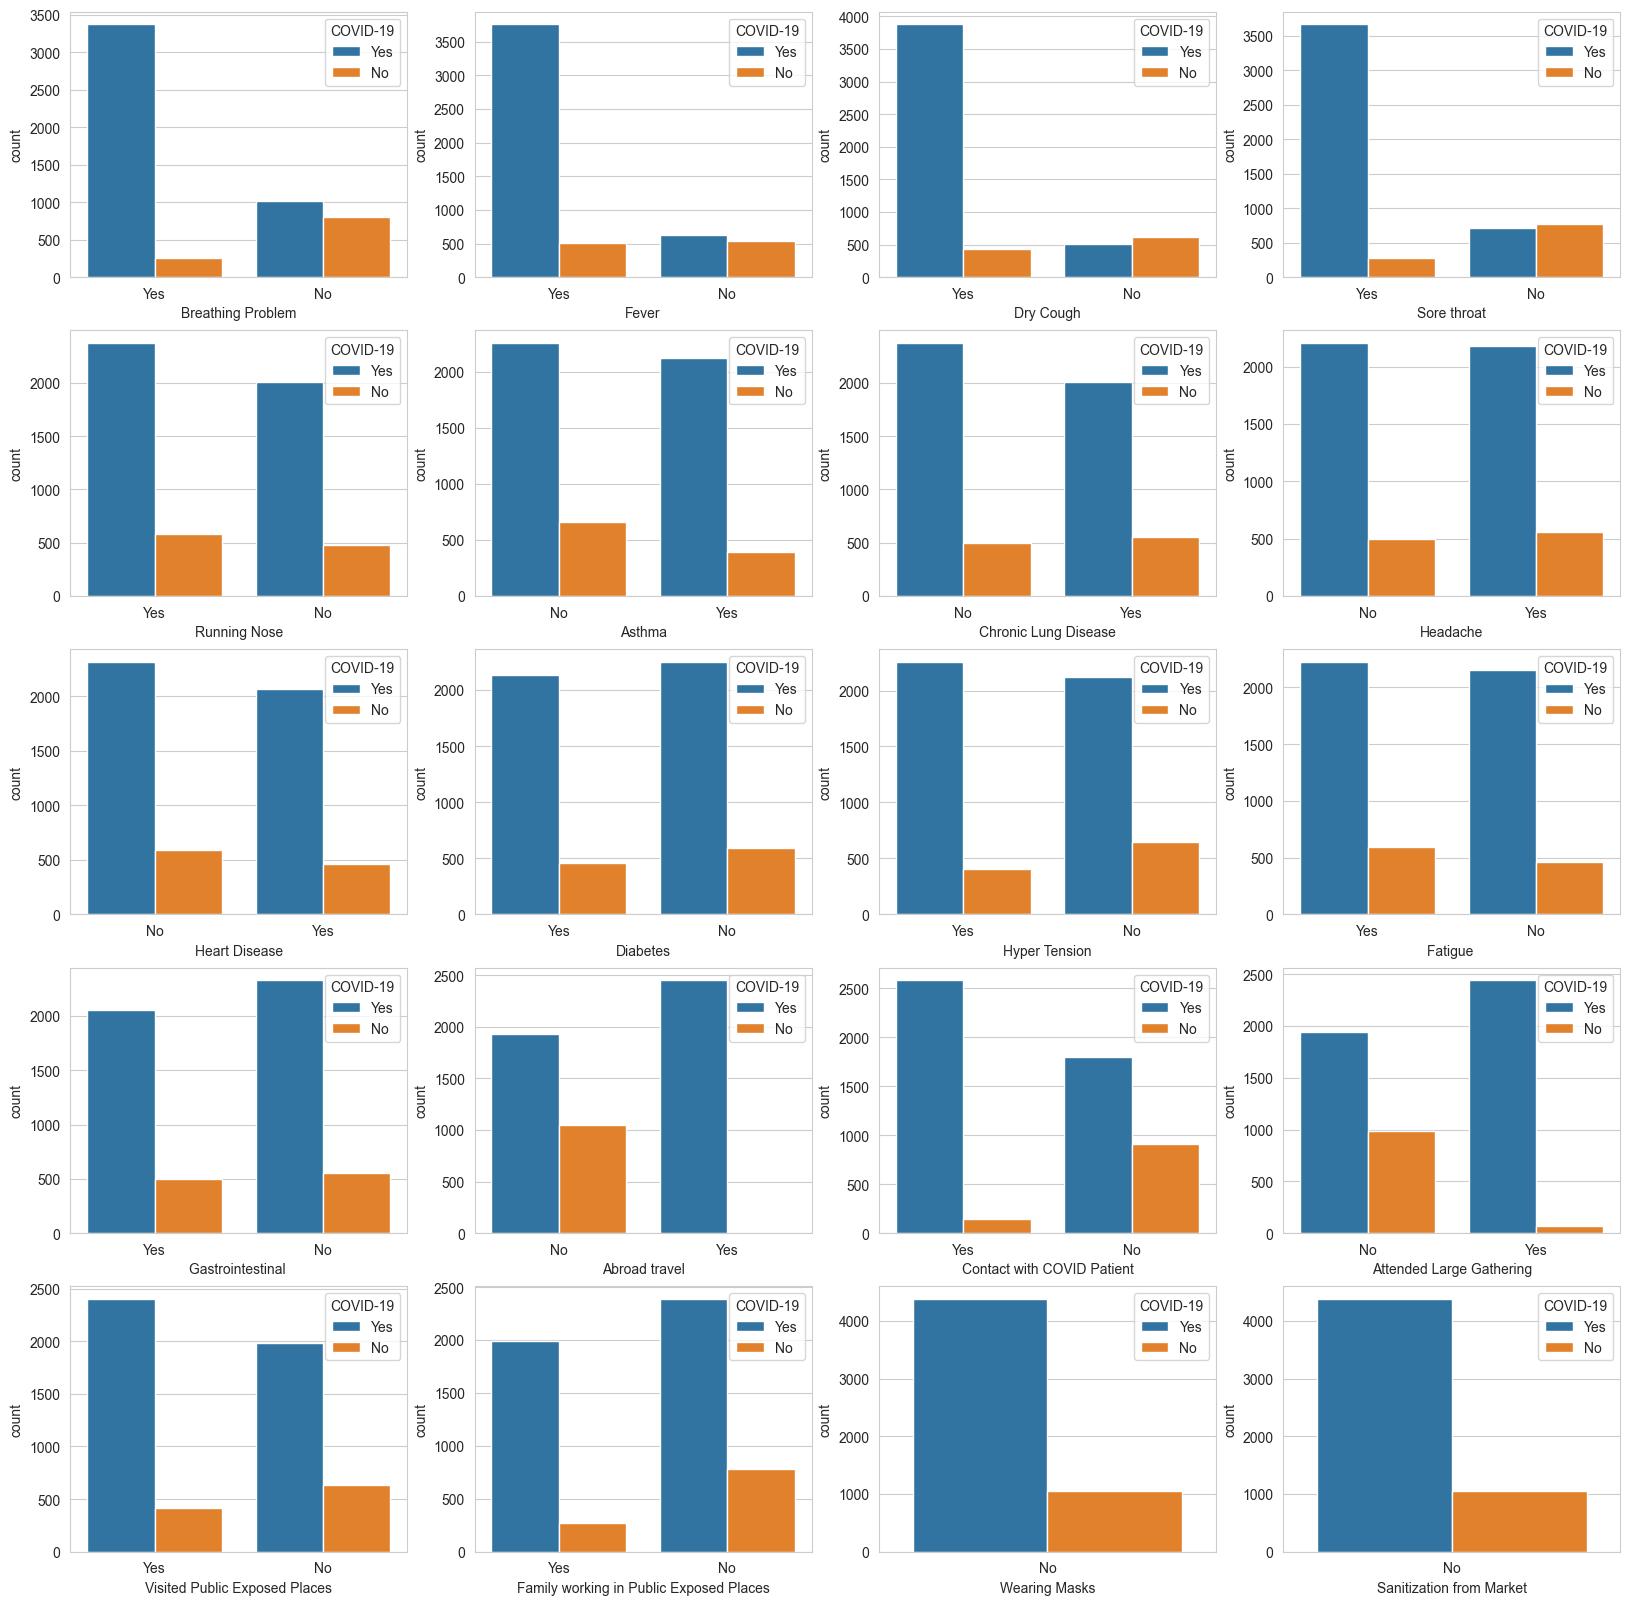

In [7]:
### Data visualizations on different column (seperated by covid-19 field)
fig, axs =plt.subplots(5,4,figsize=(20,20))
for i,col in enumerate(data.columns[:-1]):
    sns.countplot(x=col,hue='COVID-19',data=data, ax=axs[i//4, i%4])

From the pictures, we can know some symptoms or conditions have no obvious difference of covid-19 rate on Yes or No. For instance, in the column Hyper Tension, the percentage of people infected with COVID when they have hyper tension is almost similar to that percentage when they have no hyper tension. Thus, we can conclude that hyper tension does no much help in diagnosing the infection of COVID-19.
In summary, I delete the following symptoms or conditions: Running Nose, Headache, Heart Disease,Diabetes,Gastrointestinal,Wearing Masks,Sanitization from Market,Asthma, Chronic Lung Disease


## Data Processing
### Feature Extraction

In [8]:
print("before dropping some columns, the columns are:")
print(data.columns)
data=data.drop('Running Nose',axis=1)
data=data.drop('Chronic Lung Disease',axis=1)
data=data.drop('Headache',axis=1)
data=data.drop('Heart Disease',axis=1)
data=data.drop('Diabetes',axis=1)
data=data.drop('Gastrointestinal ',axis=1)
data=data.drop('Wearing Masks',axis=1)
data=data.drop('Sanitization from Market',axis=1)
data=data.drop('Asthma',axis=1)
print("now, the columns are:")
print(data.columns)


before dropping some columns, the columns are:
Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')
now, the columns are:
Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Hyper Tension', 'Fatigue ', 'Abroad travel',
       'Contact with COVID Patient', 'Attended Large Gathering',
       'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')


### Transform feature to 1 and 0

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in data.columns:
    data[col]=encoder.fit_transform(data[col])


In [23]:
data.head()

## Build Machine Learning(Decision Tree) Model
### Build model by sklearn library


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x = data.iloc[:, :-1]
y = data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Train Model and get accuracy

In [12]:
from sklearn import tree
m = tree.DecisionTreeClassifier()
m.fit(x_train,y_train)
acc = m.score(x_test, y_test)
acc

0.9788408463661453

### Save model

In [13]:
import pickle
filename = 'MLModel'
pickle.dump(m, open(filename, "wb"))